### Приклад 1. Обчислення евклідової норми

In [1]:
import numpy as np

# П'ятивимірний вектор
w = np.array([1, -2, 3, 0, 4])
norm_w = np.linalg.norm(w)
print(f"\nВектор w = {w}")
print(f"Норма ||w|| = {norm_w:.2f}")



Вектор w = [ 1 -2  3  0  4]
Норма ||w|| = 5.48


### Приклад 2. Відстань між точками

In [ ]:
# Дві точки на площині (координати)
A = np.array([1, 2])
B = np.array([4, 6])

# Відстань = норма вектора різниці
distance = np.linalg.norm(B - A)

print(f"Точка A: {A}", f"Точка B: {B}")
print(f"Вектор B - A: {B - A}")
print(f"Відстань d(A, B) = ||B - A|| = {distance}")


Точка A: [1 2] Точка B: [4 6]
Вектор B - A: [3 4]
Відстань d(A, B) = ||B - A|| = 5.0


### Приклад 3. Знаходження найближчого сусіда

In [ ]:
# Координати міст (широта, довгота - спрощено)
cities = np.array([
    [50.45, 30.52],   # Київ
    [48.29, 25.94],   # Чернівці
    [49.84, 24.03],   # Львів
    [46.48, 30.73],   # Одеса
    [49.99, 36.23]    # Харків
])

city_names = ['Київ', 'Чернівці', 'Львів', 'Одеса', 'Харків']

# Наша поточна позиція де-не-будь в районі Вінниці ;)
P = np.array([49.23, 28.47])

print(f"Поточна локація P: {P}")
print("\nВідстані до міст:")

# Обчислюємо відстані до всіх міст
distances = []
for i, city_coords in enumerate(cities):
    dist = np.linalg.norm(city_coords - P)
    distances.append(dist)
    print(f"  {city_names[i]}: {dist:.2f}")

# Знаходимо найближче місто
nearest_idx = np.argmin(distances)
print(f"\nНайближче місто: {city_names[nearest_idx]}")
print(f"Відстань: {distances[nearest_idx]:.2f}")

Поточна локація P: [49.23 28.47]

Відстані до міст:
  Київ: 2.39
  Чернівці: 2.70
  Львів: 4.48
  Одеса: 3.56
  Харків: 7.80

Найближче місто: Київ
Відстань: 2.39


### Приклад 4. Одиничні вектори та нормалізація

In [ ]:
# Довільний вектор
v = np.array([3, 4])
print(f"Оригінальний вектор: v = {v}")
print(f"Норма: ||v|| = {np.linalg.norm(v)}")

# Нормалізація
v_normalized = v / np.linalg.norm(v)
print(f"\nНормалізований вектор: v̂ = {v_normalized}")
print(f"Норма нормалізованого: ||v̂|| = {np.linalg.norm(v_normalized)}")

# Перевірка: нормалізований вектор має норму 1
print(f"Норма дорівнює 1? {np.isclose(np.linalg.norm(v_normalized), 1.0)}")


Оригінальний вектор: v = [3 4]
Норма: ||v|| = 5.0

Нормалізований вектор: v̂ = [0.6 0.8]
Норма нормалізованого: ||v̂|| = 1.0
Норма дорівнює 1? True


### Приклад 5. Обчислення різних норм

In [ ]:
import numpy as np

v = np.array([3, -4])

# Евклідова
norm_L2 = np.linalg.norm(v)
# або явно з параметром ord=2 np.linalg.norm(v, ord=2)

# Манхеттенська
norm_L1 = np.linalg.norm(v, ord=1)

# Максимуму
norm_Linf = np.linalg.norm(v, ord=np.inf)

print(f"Вектор: v = {v}")
print(f"\nЕвклідова норма: {norm_L2}")
print(f"Мангеттенська норма: {norm_L1}")
print(f"Норма максимуму: {norm_Linf}")

Вектор: v = [ 3 -4]

Евклідова норма: 5.0
Мангеттенська норма: 7.0
Норма максимуму: 4.0


### Приклад 6. Одиничні кола для різних норм на площині

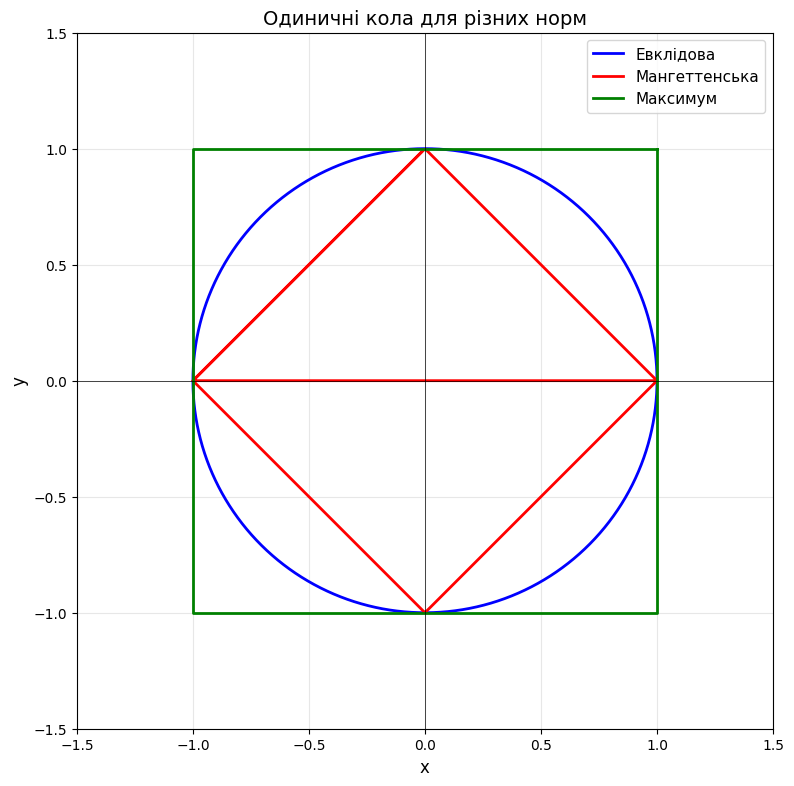

In [ ]:
import matplotlib.pyplot as plt

# Створюємо точки на одиничному "колі" для різних норм
theta = np.linspace(0, 2*np.pi, 1000)

# L2: звичайне коло x² + y² = 1
circle_L2_x = np.cos(theta)
circle_L2_y = np.sin(theta)

# L1: ромб |x| + |y| = 1
t = np.linspace(-1, 1, 250)
diamond_x1 = t[t >= 0]
diamond_y1 = 1 - diamond_x1
diamond_x2 = t[t <= 0]
diamond_y2 = 1 + diamond_x2
diamond_x3 = t[t <= 0]
diamond_y3 = -1 - diamond_x3
diamond_x4 = t[t >= 0]
diamond_y4 = -1 + diamond_x4

diamond_x = np.concatenate([diamond_x1, diamond_x2, diamond_x3, diamond_x4])
diamond_y = np.concatenate([diamond_y1, diamond_y2, diamond_y3, diamond_y4])

# L∞: квадрат max(|x|, |y|) = 1
square_x = np.array([1, 1, -1, -1, 1])
square_y = np.array([1, -1, -1, 1, 1])

# Візуалізація
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(circle_L2_x, circle_L2_y, 'b-', linewidth=2, label='Евклідова')
ax.plot(diamond_x, diamond_y, 'r-', linewidth=2, label='Мангеттенська')
ax.plot(square_x, square_y, 'g-', linewidth=2, label='Максимум')

ax.grid(True, alpha=0.3)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Одиничні кола для різних норм', fontsize=14)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

### Приклад 7. Відстань між двома точками

In [ ]:
import numpy as np

A = np.array([2, 3])
B = np.array([5, 7])

# Різниця векторів
diff = B - A
print(f"Точка A: {A}")
print(f"Точка B: {B}")
print(f"Різниця B - A: {diff}")

# Різні відстані
d_L2 = np.linalg.norm(diff, ord=2)
d_L1 = np.linalg.norm(diff, ord=1)
d_Linf = np.linalg.norm(diff, ord=np.inf)

print(f"\nЕвклідова відстань: {d_L2:.2f}")
print(f"Мангеттенська відстань: {d_L1:.2f}")
print(f"Чебишова відстань: {d_Linf:.2f}")


Точка A: [2 3]
Точка B: [5 7]
Різниця B - A: [3 4]

Евклідова відстань: 5.00
Мангеттенська відстань: 7.00
Чебишова відстань: 4.00


In [ ]:
from scipy.spatial import distance

A = np.array([2, 3])
B = np.array([5, 7])

# Різні метрики через scipy
euclidean = distance.euclidean(A, B)
manhattan = distance.cityblock(A, B)  # cityblock = Manhattan
chebyshev = distance.chebyshev(A, B)  # Chebyshev = L∞

print(f"Евклідова: {euclidean:.2f}")
print(f"Мангеттенська: {manhattan:.2f}")
print(f"Чебишова: {chebyshev:.2f}")

Евклідова: 5.00
Мангеттенська: 7.00
Чебишова: 4.00


### Приклад 8. Скалярний добуток

In [ ]:
import numpy as np

u = np.array([2, 3])
v = np.array([4, -1])

dot = np.dot(u, v)

print(f"Скалярний добуток: {dot}")

Скалярний добуток: 5


In [ ]:
dot = u @ v
print(f"Скалярний добуток: {dot}")

Скалярний добуток: 5


### Приклад 9. Обчислення кута між векторами

In [2]:
import numpy as np

# Два вектори на площині
u = np.array([3, 4])
v = np.array([4, 3])

# Обчислюємо скалярний добуток та норми
dot_product = u @ v
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)

# Косинус кута
cos_theta = dot_product / (norm_u * norm_v)

# Кут у радіанах та градусах
theta_rad = np.arccos(cos_theta)
theta_deg = np.degrees(theta_rad)

print(f"Вектор u: {u}, норма: {norm_u:.2f}")
print(f"Вектор v: {v}, норма: {norm_v:.2f}")
print(f"\nСкалярний добуток u·v: {dot_product}")
print(f"cos(θ) = {cos_theta:.4f}")
print(f"Кут θ = {theta_rad:.4f} радіан або {theta_deg:.2f} градусів")

Вектор u: [3 4], норма: 5.00
Вектор v: [4 3], норма: 5.00

Скалярний добуток u·v: 24
cos(θ) = 0.9600
Кут θ = 0.2838 радіан або 16.26 градусів


### Приклад 10. Візуалізуємо вектори та кут між ними:

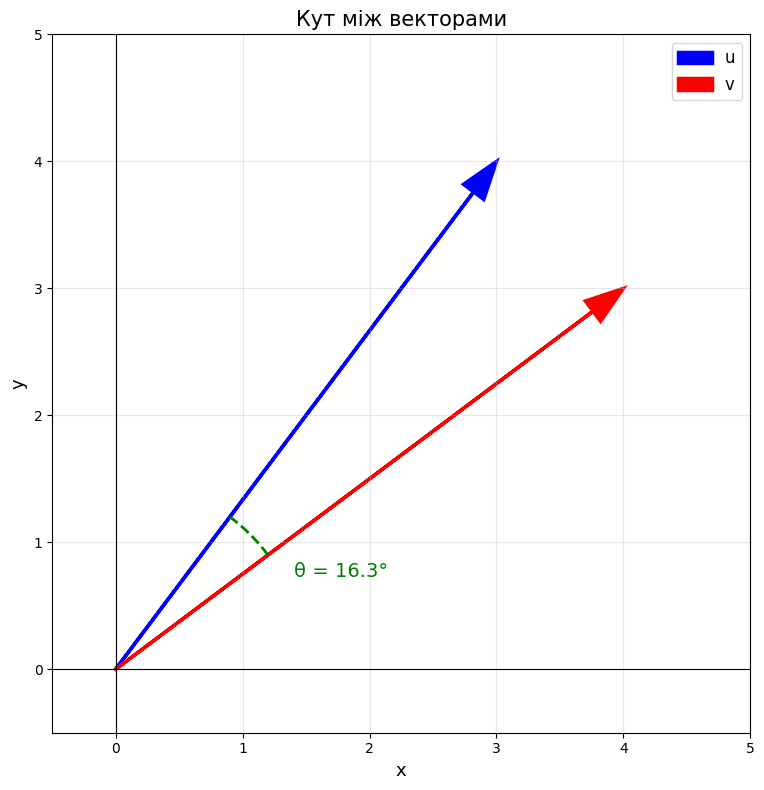

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Малюємо вектори
ax.arrow(0, 0, u[0], u[1], head_width=0.2, head_length=0.3,
         fc='blue', ec='blue', linewidth=2.5, label='u', length_includes_head=True)
ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.3,
         fc='red', ec='red', linewidth=2.5, label='v', length_includes_head=True)

# Обчислюємо кути векторів
angle_u = np.arctan2(u[1], u[0])
angle_v = np.arctan2(v[1], v[0])

# Визначаємо початковий та кінцевий кут для дуги
start_angle = min(angle_u, angle_v)
end_angle = max(angle_u, angle_v)

# Малюємо дугу кута
angle = np.linspace(start_angle, end_angle, 50)
radius = 1.5
arc_x = radius * np.cos(angle)
arc_y = radius * np.sin(angle)
ax.plot(arc_x, arc_y, 'g--', linewidth=2)

# Розташовуємо текст з кутом
text_angle = (start_angle + end_angle) / 2
text_radius = radius + 0.3 # Трохи далі від дуги
text_x = text_radius * np.cos(text_angle) + 0.5
text_y = text_radius * np.sin(text_angle) - 0.5
ax.text(text_x, text_y, f'θ = {theta_deg:.1f}°', fontsize=14, color='green',
        ha='center', va='center')


ax.grid(True, alpha=0.3)
ax.set_xlim(-0.5, 5)
ax.set_ylim(-0.5, 5)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.8)
ax.axvline(x=0, color='k', linewidth=0.8)
ax.set_xlabel('x', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.set_title('Кут між векторами', fontsize=15)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Приклад 11. Кут у різних ситуаціях

In [ ]:
# Випадок 1: Співнапрямлені вектори
u1 = np.array([1, 2])
v1 = np.array([2, 4])  # v1 = 2 * u1

angle1 = np.arccos((u1 @ v1) / (np.linalg.norm(u1) * np.linalg.norm(v1)))
print("Співнапрямлені вектори:")
print(f"  u = {u1}, v = {v1}")
print(f"  Кут: {np.degrees(angle1):.2f} градусів")

# Випадок 2: Перпендикулярні вектори
u2 = np.array([1, 0])
v2 = np.array([0, 1])

angle2 = np.arccos((u2 @ v2) / (np.linalg.norm(u2) * np.linalg.norm(v2)))
print("\nПерпендикулярні вектори:")
print(f"  u = {u2}, v = {v2}")
print(f"  Кут: {np.degrees(angle2):.2f} градусів")

# Випадок 3: Протилежно напрямлені
u3 = np.array([1, 2])
v3 = np.array([-1, -2])

angle3 = np.arccos((u3 @ v3) / (np.linalg.norm(u3) * np.linalg.norm(v3)))
print("\nПротилежно напрямлені вектори:")
print(f"  u = {u3}, v = {v3}")
print(f"  Кут: {np.degrees(angle3):.2f} градусів")

Співнапрямлені вектори:
  u = [1 2], v = [2 4]
  Кут: 0.00 градусів

Перпендикулярні вектори:
  u = [1 0], v = [0 1]
  Кут: 90.00 градусів

Протилежно напрямлені вектори:
  u = [1 2], v = [-1 -2]
  Кут: 180.00 градусів


### Приклад 11. Пошук схожих документів.

In [ ]:
import numpy as np

# Документи як вектори частот
doc1 = np.array([10, 8, 9, 7, 6])    # стаття про машинне навчання
doc2 = np.array([9, 7, 8, 6, 5])     # схожа стаття про машинне навчання
doc3 = np.array([2, 1, 1, 10, 2])    # стаття про дані, але не про ML

# Функція для обчислення косинусної схожості
def cosine_similarity(u, v):
    return (u @ v) / (np.linalg.norm(u) * np.linalg.norm(v))

# Порівнюємо документи
sim_12 = cosine_similarity(doc1, doc2)
sim_13 = cosine_similarity(doc1, doc3)
sim_23 = cosine_similarity(doc2, doc3)

print("Косинусна схожість між документами:")
print(f"  Документ 1 vs Документ 2: {sim_12:.4f}")
print(f"  Документ 1 vs Документ 3: {sim_13:.4f}")
print(f"  Документ 2 vs Документ 3: {sim_23:.4f}")


Косинусна схожість між документами:
  Документ 1 vs Документ 2: 0.9997
  Документ 1 vs Документ 3: 0.6246
  Документ 2 vs Документ 3: 0.6150


### Приклад 12. Рекомендаційні системи.

In [ ]:
import numpy as np

def cosine_similarity(u, v):
    return (u @ v) / (np.linalg.norm(u) * np.linalg.norm(v))

# Оцінки користувачів (5 фільмів)
user1 = np.array([5, 4, 0, 0, 1])  # любить перші два фільми
user2 = np.array([4, 5, 0, 1, 0])  # схожі смаки
user3 = np.array([1, 0, 5, 4, 5])  # зовсім інші смаки

print("Користувачі:")
print(f"  User 1: {user1}")
print(f"  User 2: {user2}")
print(f"  User 3: {user3}")

# Обчислюємо схожість
sim_12 = cosine_similarity(user1, user2)
sim_13 = cosine_similarity(user1, user3)

print(f"\nКосинусна схожість User1 vs User2: {sim_12:.4f}")
print(f"Косинусна схожість User1 vs User3: {sim_13:.4f}")


Користувачі:
  User 1: [5 4 0 0 1]
  User 2: [4 5 0 1 0]
  User 3: [1 0 5 4 5]

Косинусна схожість User1 vs User2: 0.9524
Косинусна схожість User1 vs User3: 0.1885


### Приклад 13. Стандартні базисні вектори

In [ ]:
import numpy as np

# Приклад 1: Стандартні базисні вектори
e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])
e3 = np.array([0, 0, 1])

print("Стандартні базисні вектори:")
print(f"  e₁ = {e1}")
print(f"  e₂ = {e2}")
print(f"  e₃ = {e3}")
print(f"\ne₁ · e₂ = {e1 @ e2}")
print(f"e₁ · e₃ = {e1 @ e3}")
print(f"e₂ · e₃ = {e2 @ e3}")
print("\nУсі три вектори попарно ортогональні")


Стандартні базисні вектори:
  e₁ = [1 0 0]
  e₂ = [0 1 0]
  e₃ = [0 0 1]

e₁ · e₂ = 0
e₁ · e₃ = 0
e₂ · e₃ = 0

Усі три вектори попарно ортогональні


### Приклад 14. Побудова ортогонального вектора.

Вектор u: [5 3]

Ортогональні вектори:
  v₁ = [-3  5], u·v₁ = 0
  v₂ = [ 3 -5], u·v₂ = 0


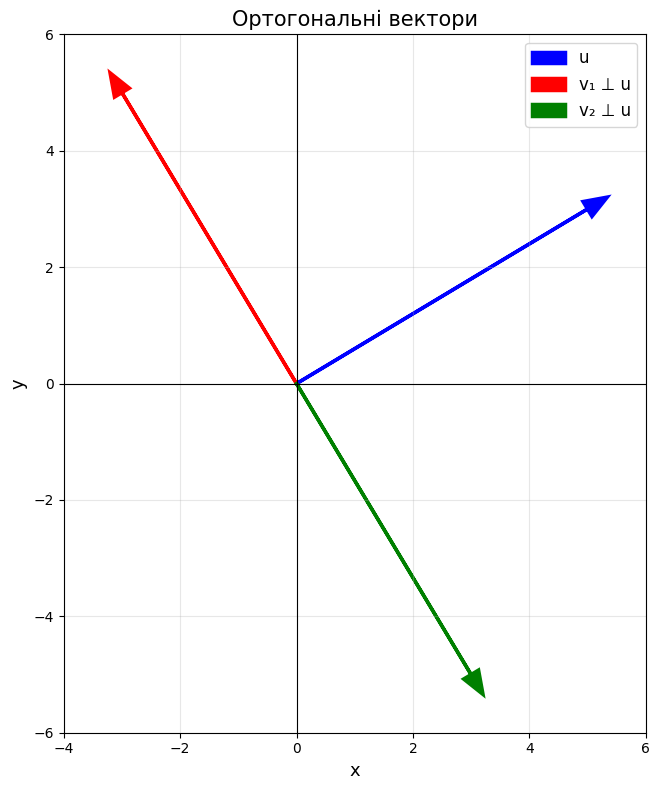

In [ ]:
# Заданий вектор
u = np.array([5, 3])

# Ортогональний вектор
v1 = np.array([-u[1], u[0]])
v2 = np.array([u[1], -u[0]])

print(f"Вектор u: {u}")
print(f"\nОртогональні вектори:")
print(f"  v₁ = {v1}, u·v₁ = {u @ v1}")
print(f"  v₂ = {v2}, u·v₂ = {u @ v2}")

# Візуалізація
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

ax.arrow(0, 0, u[0], u[1], head_width=0.3, head_length=0.4,
         fc='blue', ec='blue', linewidth=2.5, label='u')
ax.arrow(0, 0, v1[0], v1[1], head_width=0.3, head_length=0.4,
         fc='red', ec='red', linewidth=2.5, label='v₁ ⊥ u')
ax.arrow(0, 0, v2[0], v2[1], head_width=0.3, head_length=0.4,
         fc='green', ec='green', linewidth=2.5, label='v₂ ⊥ u')

ax.grid(True, alpha=0.3)
ax.set_xlim(-4, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.8)
ax.axvline(x=0, color='k', linewidth=0.8)
ax.set_xlabel('x', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.set_title('Ортогональні вектори', fontsize=15)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Приклад 15. Практичне застосування: розклад сигналів.

∫ cos(t)·sin(t) dt ≈ -0.0000000000


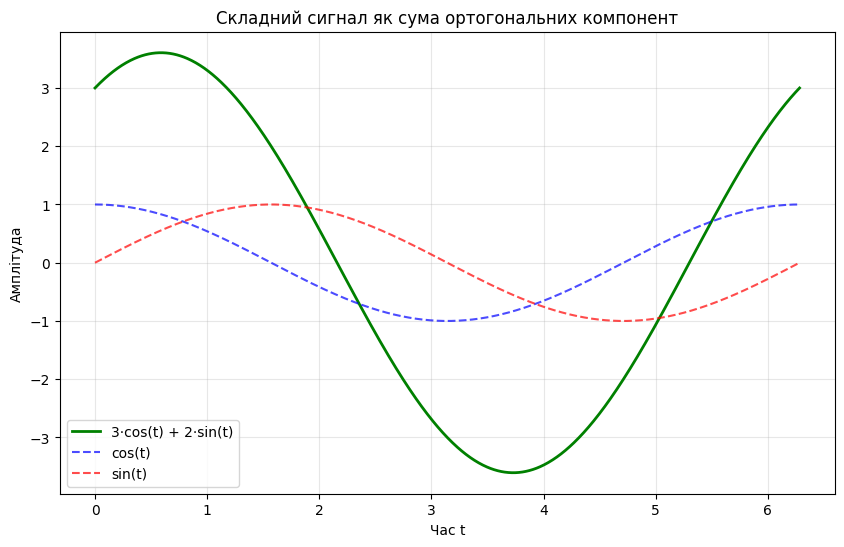

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2*np.pi, 1000)

signal_cos = np.cos(t)
signal_sin = np.sin(t)

# Перевірка ортогональності (інтеграл добутку ≈ 0)
orthogonality = np.trapezoid(signal_cos * signal_sin, t)
print(f"∫ cos(t)·sin(t) dt ≈ {orthogonality:.10f}")

# Створимо складний сигнал як суму двох ортогональних компонент
complex_signal = 3*signal_cos + 2*signal_sin

plt.figure(figsize=(10, 6))
plt.plot(t, complex_signal, 'g-', linewidth=2, label='3·cos(t) + 2·sin(t)')
plt.plot(t, signal_cos, 'b--', alpha=0.7, label='cos(t)')
plt.plot(t, signal_sin, 'r--', alpha=0.7, label='sin(t)')
plt.title('Складний сигнал як сума ортогональних компонент')
plt.xlabel('Час t')
plt.ylabel('Амплітуда')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Приклад 16. Пошук незалежних напрямків у даних (PCA)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Завантажуємо дані про квіти Iris
iris = load_iris()
X = iris.data  # 150 квітів, 4 ознаки

print(f"Оригінальні дані: {X.shape}")

# Зменшуємо кількість вимірів до 2 головних компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"Після PCA: {X_pca.shape}")

# Вектори головних компонент
pc1, pc2 = pca.components_
dot_product = pc1 @ pc2

print(f"\nПерша компонента: {pc1}")
print(f"Друга компонента: {pc2}")
print(f"\nСкалярний добуток PC1·PC2 = {dot_product:.10f}")
print(f"Ортогональні: {np.abs(dot_product) < 1e-10}")


Оригінальні дані: (150, 4)
Після PCA: (150, 2)

Перша компонента: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Друга компонента: [ 0.65658877  0.73016143 -0.17337266 -0.07548102]

Скалярний добуток PC1·PC2 = -0.0000000000
Ортогональні: True


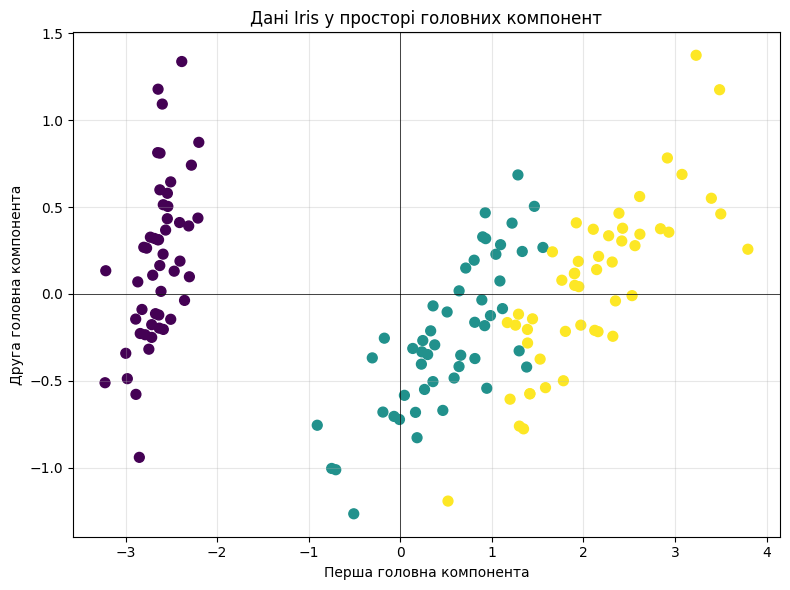

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis', s=50)
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.title('Дані Iris у просторі головних компонент')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()


### Приклад 17. Векторний добуток

In [ ]:
# Вектори
u = np.array([2, 3, 4])
v = np.array([5, 6, 7])

# Через NumPy
w = np.cross(u, v)


print(f"Вектор u: {u}")
print(f"Вектор v: {v}")
print(f"\nВекторний добуток (NumPy): {w}")

# Перевірка ортогональності
print(f"\nОртогональність:")
print(f"  u · (u×v) = {u @ w}")
print(f"  v · (u×v) = {v @ w}")

Вектор u: [2 3 4]
Вектор v: [5 6 7]

Векторний добуток (NumPy): [-3  6 -3]

Ортогональність:
  u · (u×v) = 0
  v · (u×v) = 0


### Приклад 18. Візуалізація векторного добутку

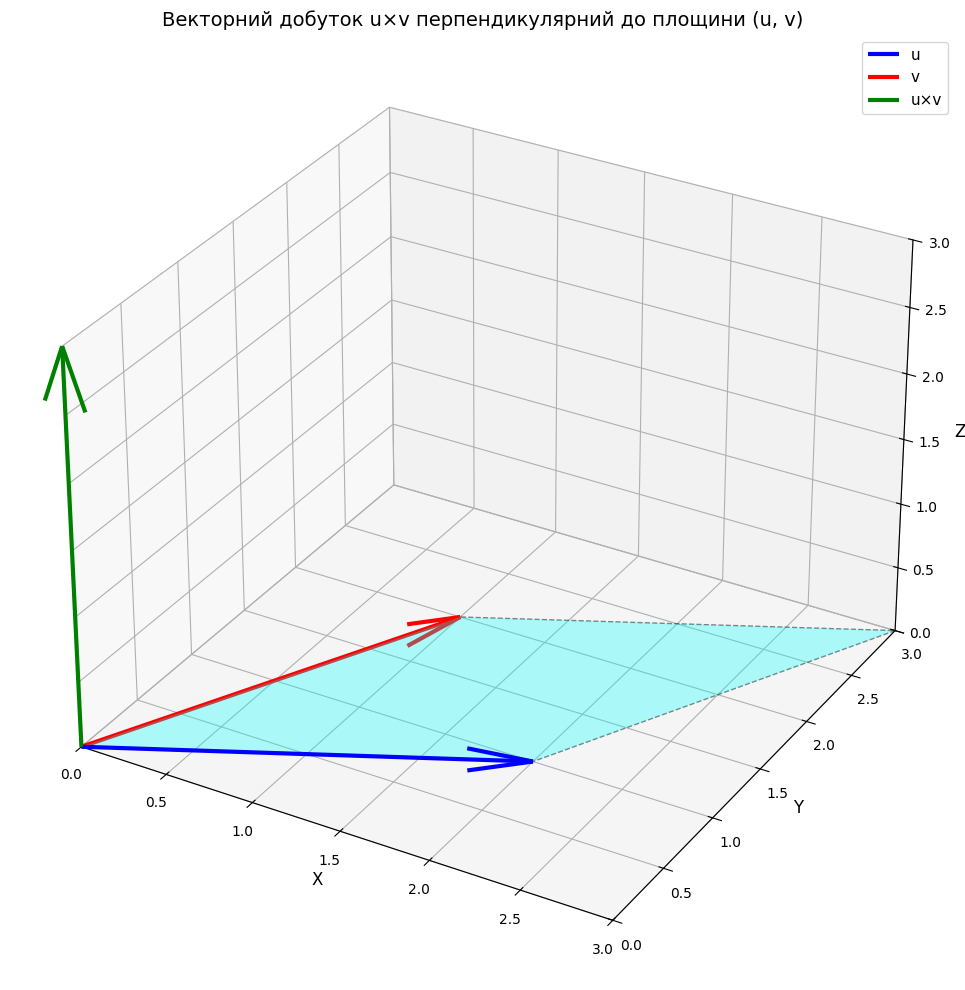

Вектор u: [2 1 0]
Вектор v: [1 2 0]
Векторний добуток u×v: [0 0 3]

Вектор u×v перпендикулярний до площини, утвореної u та v
Площа паралелограма: 3.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Вектори
u = np.array([2, 1, 0])
v = np.array([1, 2, 0])
w = np.cross(u, v)

# Створюємо 3D графік
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Малюємо вектори
ax.quiver(0, 0, 0, u[0], u[1], u[2], color='blue',
          arrow_length_ratio=0.15, linewidth=3, label='u')
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='red',
          arrow_length_ratio=0.15, linewidth=3, label='v')
ax.quiver(0, 0, 0, w[0], w[1], w[2], color='green',
          arrow_length_ratio=0.15, linewidth=3, label='u×v')

# Малюємо паралелограм
parallelogram = np.array([
    [0, 0, 0],
    u,
    u + v,
    v,
    [0, 0, 0]
])
ax.plot(parallelogram[:, 0], parallelogram[:, 1], parallelogram[:, 2],
        'k--', linewidth=1, alpha=0.5)

# Заповнюємо паралелограм
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
vertices = [parallelogram[:-1]]
poly = Poly3DCollection(vertices, alpha=0.3, facecolor='cyan', edgecolor='none')
ax.add_collection3d(poly)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('Векторний добуток u×v перпендикулярний до площини (u, v)', fontsize=14)
ax.legend(fontsize=11)

# Налаштування меж
max_val = max(np.abs([u, v, w]).max(), 3)
ax.set_xlim([0, max_val])
ax.set_ylim([0, max_val])
ax.set_zlim([0, max_val]) # Changed z-limit to start from 0

plt.tight_layout()
plt.show()

### Приклад 19. Векторні підпростори

In [ ]:
import numpy as np

def on_line_2x(p):      # пряма y = 2x
    return np.isclose(p[1], 2*p[0])

def on_line_2x_plus_1(p):  # пряма y = 2x + 1
    return np.isclose(p[1], 2*p[0] + 1)

direction = np.array([1.0, 2.0])

# підпростір: y = 2x
v1 = 3 * direction
v2 = -1.5 * direction
alpha = 2.7

sum_ok_sub = on_line_2x(v1 + v2)
scale_ok_sub = on_line_2x(alpha * v1)

# не підпростір: y = 2x + 1
p1 = np.array([0.0, 1.0])
p2 = np.array([1.0, 3.0])

sum_ok_shift = on_line_2x_plus_1(p1 + p2)
scale_ok_shift = on_line_2x_plus_1(alpha * p1)

print("y = 2x  сума ->", sum_ok_sub, "  множення ->", scale_ok_sub)
print("y = 2x+1 сума ->", sum_ok_shift, "  множення ->", scale_ok_shift)


y = 2x  сума -> True   множення -> True
y = 2x+1 сума -> False   множення -> False


### Приклад 20. Перевірка лінійної незалежності векторів

In [ ]:
import numpy as np

# Три вектори в R²
v1 = np.array([1, 0])
v2 = np.array([0, 1])
v3 = np.array([2, 3])

# Складаємо матрицю з векторів як стовпців
A = np.column_stack([v1, v2, v3])
print("Матриця з векторів:")
print(A)

rank = np.linalg.matrix_rank(A)
print(f"\nРанг матриці: {rank}")
print(f"Кількість векторів: {A.shape[1]}")

if rank < A.shape[1]:
    print(f"Вектори лінійно залежні")
    print(f"Лінійно незалежних серед них: {rank}")
else:
    print(f"Вектори лінійно незалежні")

Матриця з векторів:
[[1 0 2]
 [0 1 3]]

Ранг матриці: 2
Кількість векторів: 3
Вектори лінійно залежні
Лінійно незалежних серед них: 2


In [ ]:
# Лише перші два вектори
A2 = np.column_stack([v1, v2])
rank2 = np.linalg.matrix_rank(A2)
print(f"\nМатриця з v1 та v2:")
print(A2)
print(f"Ранг: {rank2}")
print(f"Кількість векторів: {A2.shape[1]}")


Матриця з v1 та v2:
[[1 0]
 [0 1]]
Ранг: 2
Кількість векторів: 2


### Приклад 21. Ортогональний базис

In [ ]:
import numpy as np

# Ортогональний базис для R²
v1 = np.array([3, 0])
v2 = np.array([0, 4])

print("Ортогональний базис:")
print(f"  v1 = {v1}")
print(f"  v2 = {v2}")

# Виразимо вектор w через цей базис
w = np.array([6, 8])
print(f"\nВектор w = {w}")

# Коефіцієнти ортогонального базису:
alpha1 = (w @ v1) / (v1 @ v1)
alpha2 = (w @ v2) / (v2 @ v2)

print(f"w = {alpha1:.2f}*v1 + {alpha2:.2f}*v2")

# Перевірка
w_reconstructed = alpha1 * v1 + alpha2 * v2
print(f"Результат: {w_reconstructed}")

Ортогональний базис:
  v1 = [3 0]
  v2 = [0 4]

Вектор w = [6 8]
w = 2.00*v1 + 2.00*v2
Результат: [6. 8.]


### Приклад 22. Ортонормований базис

In [ ]:
# З попереднього прикладу
v1 = np.array([3, 0])
v2 = np.array([0, 4])

print("Ортогональний базис:")
print(f"  v1 = {v1}, ||v1|| = {np.linalg.norm(v1)}")
print(f"  v2 = {v2}, ||v2|| = {np.linalg.norm(v2)}")

# Нормалізуємо вектори
u1 = v1 / np.linalg.norm(v1)
u2 = v2 / np.linalg.norm(v2)

print("\nОртонормований базис:")
print(f"  u1 = {u1}, ||u1|| = {np.linalg.norm(u1):.4f}")
print(f"  u2 = {u2}, ||u2|| = {np.linalg.norm(u2):.4f}")

# Коефіцієнти ортонормованого базису
w = np.array([6, 8])
beta1 = w @ u1
beta2 = w @ u2

print(f"\nВиразимо w = {w} через ортонормований базис:")
print(f"w = {beta1:.2f}*u1 + {beta2:.2f}*u2")

Ортогональний базис:
  v1 = [3 0], ||v1|| = 3.0
  v2 = [0 4], ||v2|| = 4.0

Ортонормований базис:
  u1 = [1. 0.], ||u1|| = 1.0000
  u2 = [0. 1.], ||u2|| = 1.0000

Виразимо w = [6 8] через ортонормований базис:
w = 6.00*u1 + 8.00*u2


### Приклад 23. Проєкція вектора на вектор

In [ ]:
import numpy as np

# Два вектори
a = np.array([4, 3])
b = np.array([2, 1])

print(f"Вектор a = {a}")
print(f"Вектор b = {b}")

# Обчислюємо проєкцію a на b
proj_b_a = ((a @ b) / (b @ b)) * b

print(f"\nПроєкція a на b:")
print(f"  proj_b(a) = {proj_b_a}")
print(f"  Довжина проєкції: {np.linalg.norm(proj_b_a):.4f}")

# Скалярна проєкція
comp_b_a = (a @ b) / np.linalg.norm(b)
print(f"  Скалярна проєкція: {comp_b_a:.4f}")

Вектор a = [4 3]
Вектор b = [2 1]

Проєкція a на b:
  proj_b(a) = [4.4 2.2]
  Довжина проєкції: 4.9193
  Скалярна проєкція: 4.9193


### Приклад 24. Проєкція вектора на площину в R³

In [ ]:
import numpy as np

# Визначаємо площину через ортонормований базис
u1 = np.array([1, 0, 0])
u2 = np.array([0, 1, 0])

# Вектор, який проєктуємо
v = np.array([2, 3, 5])

print(f"Підпростір (площина xy):")
print(f"  Базис: u1 = {u1}, u2 = {u2}")
print(f"Вектор v = {v}")

# Проєкція на підпростір
proj_V = (v @ u1) * u1 + (v @ u2) * u2

print(f"\nПроєкція v на площину:")
print(f"  proj_V(v) = {proj_V}")

# Перпендикулярна компонента
perp = v - proj_V
print(f"  Перпендикулярна частина = {perp}")

print(f"\nПеревірка перпендикулярності:")
print(f"  perp · u1 = {perp @ u1}")
print(f"  perp · u2 = {perp @ u2}")

Підпростір (площина xy):
  Базис: u1 = [1 0 0], u2 = [0 1 0]
Вектор v = [2 3 5]

Проєкція v на площину:
  proj_V(v) = [2 3 0]
  Перпендикулярна частина = [0 0 5]

Перевірка перпендикулярності:
  perp · u1 = 0
  perp · u2 = 0


In [ ]:
# Площина, задана двома ортогональними векторами
v1 = np.array([1, 1, 0])
v2 = np.array([-1, 1, 0])

# Нормалізуємо для отримання ортонормованого базису
u1 = v1 / np.linalg.norm(v1)
u2 = v2 / np.linalg.norm(v2)

print("Площина з ортонормованим базисом:")
print(f"  u1 = {u1}")
print(f"  u2 = {u2}")

# Проєктуємо вектор
v = np.array([3, 2, 4])
proj = (v @ u1) * u1 + (v @ u2) * u2

print(f"\nВектор v = {v}")
print(f"Проєкція на площину = {proj}")

Площина з ортонормованим базисом:
  u1 = [0.70710678 0.70710678 0.        ]
  u2 = [-0.70710678  0.70710678  0.        ]

Вектор v = [3 2 4]
Проєкція на площину = [3. 2. 0.]


### Приклад 25. Матричне представлення проєкції

In [ ]:
# Матричне представлення
Q = np.column_stack([u1, u2])
print(f"Матриця базису Q:")
print(Q)

# Матриця проєкції
P = Q @ Q.T
print(f"\nМатриця проєкції P = Q Q^T:")
print(P)

# Проєкція через матричне множення
v = np.array([3, 2, 4])
proj_matrix = P @ v

print(f"\nВектор v = {v}")
print(f"Проєкція через матрицю: P @ v = {proj_matrix}")

# Перевірка ідемпотентності
P_squared = P @ P
print(f"\nПеревірка P² = P:")
print(f"  Різниця ||P² - P|| = {np.linalg.norm(P_squared - P):.10f}")

Матриця базису Q:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]
 [ 0.          0.        ]]

Матриця проєкції P = Q Q^T:
[[ 1.00000000e+00 -2.23711432e-17  0.00000000e+00]
 [-2.23711432e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

Вектор v = [3 2 4]
Проєкція через матрицю: P @ v = [3. 2. 0.]

Перевірка P² = P:
  Різниця ||P² - P|| = 0.0000000000


### Приклад 26. Масштабування

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Матриця масштабування:
# розтягуємо в 2 рази по осі x, стискаємо у 2 рази по осі y
S = np.array([
    [2, 0],
    [0, 0.5]
])

# Вихідна фігура — квадрат одиничного розміру
square = np.array([
    [0, 1, 1, 0],  # координати x
    [0, 0, 1, 1]   # координати y
])

# Застосовуємо перетворення до всіх вершин
square_scaled = S @ square

# Виведення результату
print("Матриця масштабування S:")
print(S)
print("\nПочатковий квадрат (рядки: x, y):")
print(square)
print("\nПісля перетворення S·square:")
print(square_scaled)

Матриця масштабування S:
[[2.  0. ]
 [0.  0.5]]

Початковий квадрат (рядки: x, y):
[[0 1 1 0]
 [0 0 1 1]]

Після перетворення S·square:
[[0.  2.  2.  0. ]
 [0.  0.  0.5 0.5]]


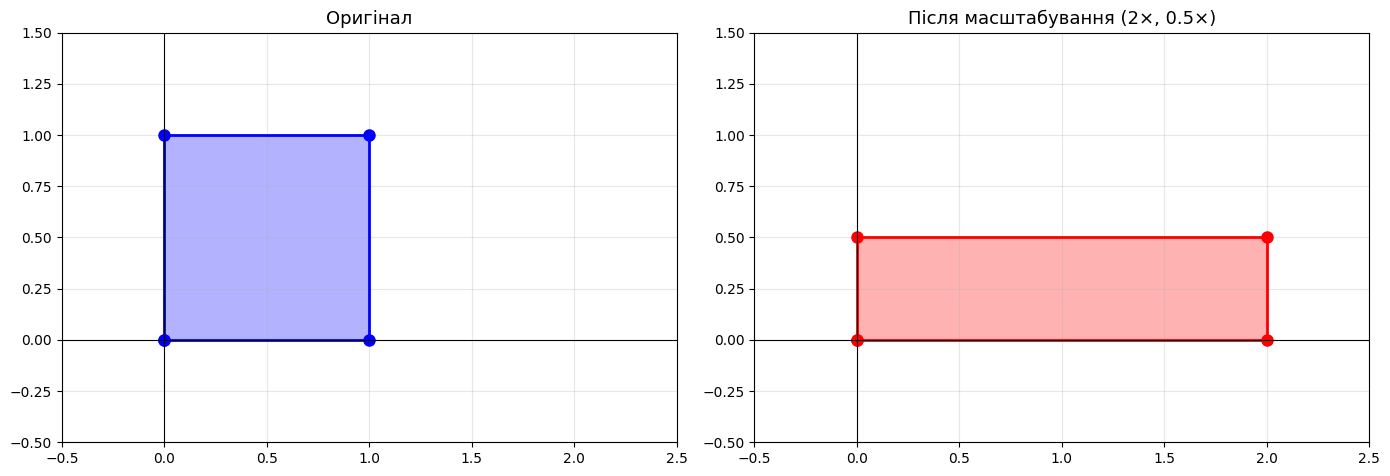

In [ ]:
# Візуалізація
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Оригінал
ax1.plot(np.append(square[0], square[0,0]), np.append(square[1], square[1,0]), 'b-', linewidth=2, marker='o', markersize=8)
ax1.fill(square[0], square[1], alpha=0.3, color='blue')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 1.5)
ax1.set_aspect('equal')
ax1.set_title('Оригінал', fontsize=13)
ax1.axhline(y=0, color='k', linewidth=0.8)
ax1.axvline(x=0, color='k', linewidth=0.8)

# Після масштабування
ax2.plot(np.append(square_scaled[0], square_scaled[0,0]), np.append(square_scaled[1], square_scaled[1,0]), 'r-', linewidth=2, marker='o', markersize=8)
ax2.fill(square_scaled[0], square_scaled[1], alpha=0.3, color='red')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 2.5)
ax2.set_ylim(-0.5, 1.5)
ax2.set_aspect('equal')
ax2.set_title('Після масштабування (2×, 0.5×)', fontsize=13)
ax2.axhline(y=0, color='k', linewidth=0.8)
ax2.axvline(x=0, color='k', linewidth=0.8)

plt.tight_layout()
plt.show()

### Приклад 27. Обертання

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Вихідна фігура — квадрат одиничного розміру
square = np.array([
    [0, 1, 1, 0],  # координати x
    [0, 0, 1, 1]   # координати y
])

# Обертання на 45 градусів
theta = np.pi / 4  # 45 градусів
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Застосовуємо до квадрата
square_rotated = R @ square

# Виведення результату
print("Матриця Обертання R:")
print(R)
print("\nПочатковий квадрат (рядки: x, y):")
print(square)
print("\nПісля перетворення R · square:")
print(square_rotated)


Матриця Обертання R:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Початковий квадрат (рядки: x, y):
[[0 1 1 0]
 [0 0 1 1]]

Після перетворення R · square:
[[ 0.00000000e+00  7.07106781e-01  1.11022302e-16 -7.07106781e-01]
 [ 0.00000000e+00  7.07106781e-01  1.41421356e+00  7.07106781e-01]]


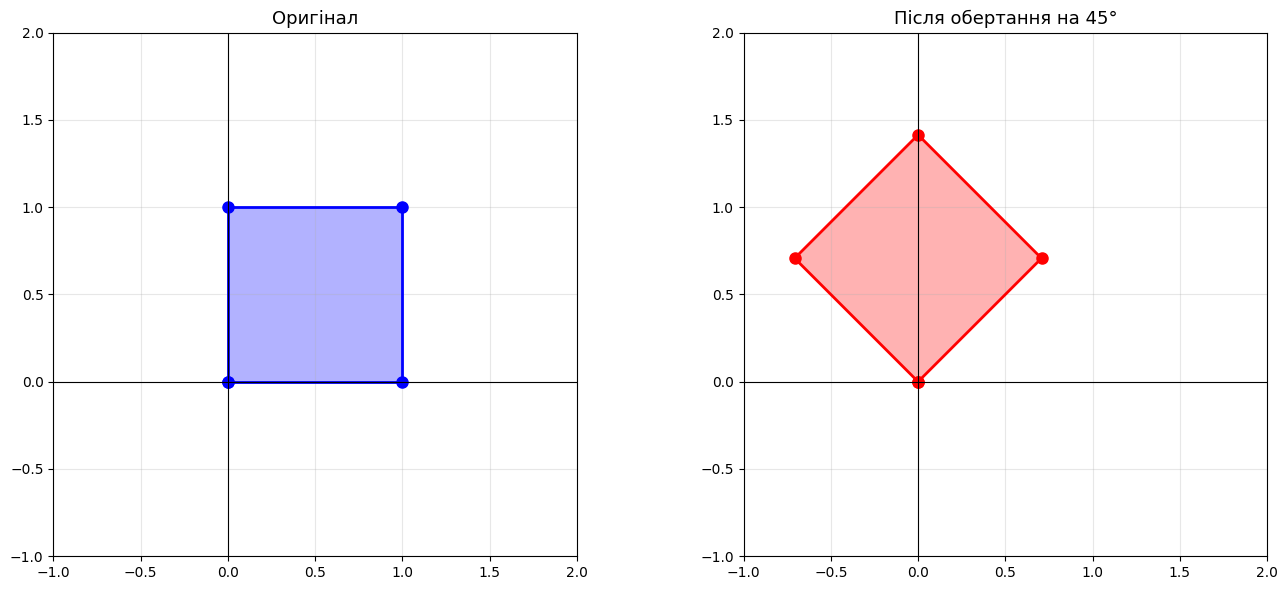

In [ ]:
# Візуалізація
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(np.append(square[0], square[0,0]), np.append(square[1], square[1,0]), 'b-', linewidth=2, marker='o', markersize=8)
ax1.fill(square[0], square[1], alpha=0.3, color='blue')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, 2)
ax1.set_ylim(-1, 2)
ax1.set_aspect('equal')
ax1.set_title('Оригінал', fontsize=13)
ax1.axhline(y=0, color='k', linewidth=0.8)
ax1.axvline(x=0, color='k', linewidth=0.8)

ax2.plot(np.append(square_rotated[0], square_rotated[0,0]), np.append(square_rotated[1], square_rotated[1,0]), 'r-', linewidth=2, marker='o', markersize=8)
ax2.fill(square_rotated[0], square_rotated[1], alpha=0.3, color='red')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, 2)
ax2.set_ylim(-1, 2)
ax2.set_aspect('equal')
ax2.set_title('Після обертання на 45°', fontsize=13)
ax2.axhline(y=0, color='k', linewidth=0.8)
ax2.axvline(x=0, color='k', linewidth=0.8)

plt.tight_layout()
plt.show()

### Приклад 28. Відображення

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Вихідна фігура — квадрат одиничного розміру
square = np.array([
    [0, 1, 1, 0],  # координати x
    [0, 0, 1, 1]   # координати y
])

# Відображення відносно осі x
M_x = np.array([
    [1, 0],
    [0, -1]
])

square_reflected = M_x @ square

# Виведення результату
print("Матриця Відображення M_x:")
print(M_x)
print("\nПочатковий квадрат (рядки: x, y):")
print(square)
print("\nПісля перетворення M_x · square:")
print(square_reflected)

Матриця Відображення M_x:
[[ 1  0]
 [ 0 -1]]

Початковий квадрат (рядки: x, y):
[[0 1 1 0]
 [0 0 1 1]]

Після перетворення M_x · square:
[[ 0  1  1  0]
 [ 0  0 -1 -1]]


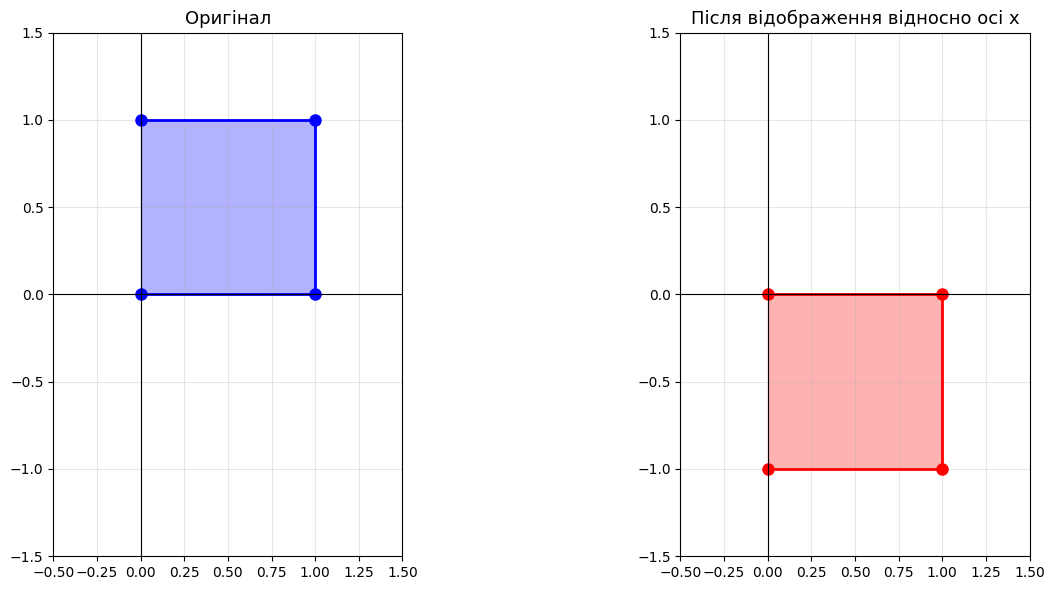

In [ ]:
# Візуалізація
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(square[0], square[1], 'b-', linewidth=2, marker='o', markersize=8)
ax1.fill(square[0], square[1], alpha=0.3, color='blue')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_aspect('equal')
ax1.set_title('Оригінал', fontsize=13)
ax1.axhline(y=0, color='k', linewidth=0.8)
ax1.axvline(x=0, color='k', linewidth=0.8)

ax2.plot(square_reflected[0], square_reflected[1], 'r-', linewidth=2, marker='o', markersize=8)
ax2.fill(square_reflected[0], square_reflected[1], alpha=0.3, color='red')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal')
ax2.set_title('Після відображення відносно осі x', fontsize=13)
ax2.axhline(y=0, color='k', linewidth=0.8)
ax2.axvline(x=0, color='k', linewidth=0.8)

plt.tight_layout()
plt.show()

### Приклад 29. Зсув

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Вихідна фігура — квадрат одиничного розміру
square = np.array([
    [0, 1, 1, 0],  # координати x
    [0, 0, 1, 1]   # координати y
])

# Горизонтальний зсув
k = 0.5
H = np.array([
    [1, k],
    [0, 1]
])

square_sheared = H @ square

# Виведення результату
print("Матриця горизонтального зсуву H:")
print(H)
print("\nПочатковий квадрат (рядки: x, y):")
print(square)
print("\nПісля перетворення H · square:")
print(square_sheared)

Матриця горизонтального зсуву H:
[[1.  0.5]
 [0.  1. ]]

Початковий квадрат (рядки: x, y):
[[0 1 1 0]
 [0 0 1 1]]

Після перетворення H · square:
[[0.  1.  1.5 0.5]
 [0.  0.  1.  1. ]]


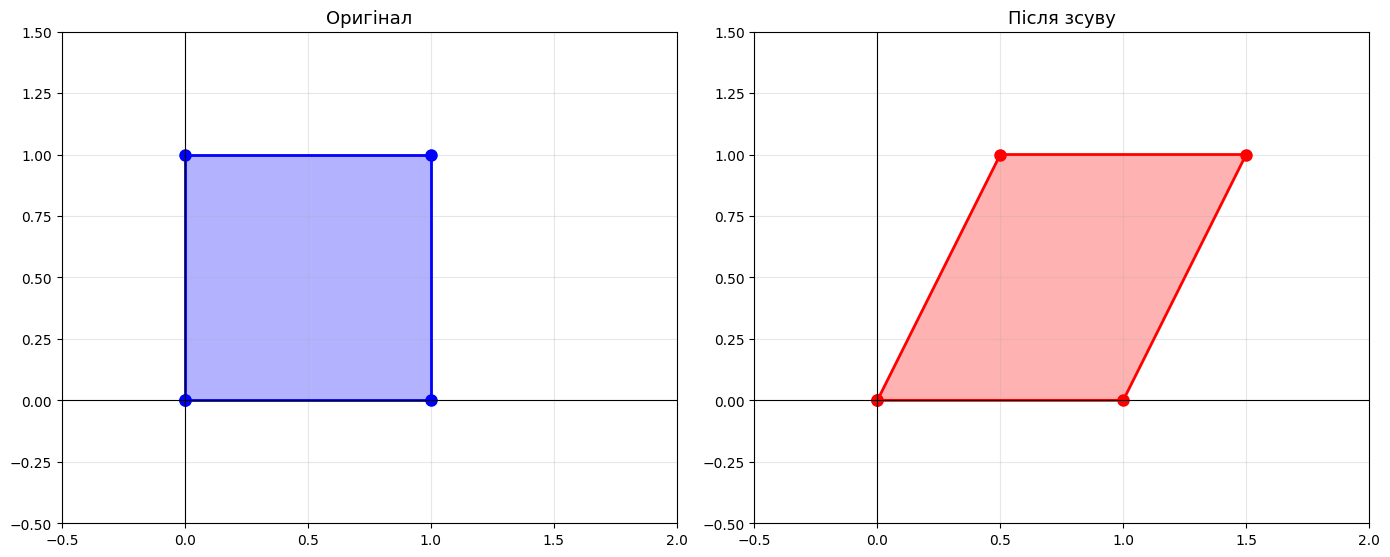

In [ ]:
# Візуалізація
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(np.append(square[0], square[0,0]), np.append(square[1], square[1,0]), 'b-', linewidth=2, marker='o', markersize=8)
ax1.fill(square[0], square[1], alpha=0.3, color='blue')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 2)
ax1.set_ylim(-0.5, 1.5)
ax1.set_aspect('equal')
ax1.set_title('Оригінал', fontsize=13)
ax1.axhline(y=0, color='k', linewidth=0.8)
ax1.axvline(x=0, color='k', linewidth=0.8)

ax2.plot(np.append(square_sheared[0], square_sheared[0,0]), np.append(square_sheared[1], square_sheared[1,0]), 'r-', linewidth=2, marker='o', markersize=8)
ax2.fill(square_sheared[0], square_sheared[1], alpha=0.3, color='red')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 2)
ax2.set_ylim(-0.5, 1.5)
ax2.set_aspect('equal')
ax2.set_title('Після зсуву', fontsize=13)
ax2.axhline(y=0, color='k', linewidth=0.8)
ax2.axvline(x=0, color='k', linewidth=0.8)

plt.tight_layout()
plt.show()

### Приклад 30. Композиція перетворень

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Вихідна фігура — квадрат одиничного розміру
square = np.array([
    [0, 1, 1, 0],  # координати x
    [0, 0, 1, 1]   # координати y
])

# Спочатку масштабуємо, потім обертаємо
S = np.array([[2, 0], [0, 0.5]])
R = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
              [np.sin(np.pi/4), np.cos(np.pi/4)]])

# Композиція: спочатку S, потім R
composite = R @ S

print("Композиція перетворень:")
print("1. Масштабування:")
print(S)
print("2. Обертання:")
print(R)
print("Результат R @ S:")
print(composite)

square_composite = composite @ square

# Виведення результату
print("\nПочатковий квадрат (рядки: x, y):")
print(square)
print("\nПісля перетворення:")
print(square_composite)

Композиція перетворень:
1. Масштабування:
[[2.  0. ]
 [0.  0.5]]
2. Обертання:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Результат R @ S:
[[ 1.41421356 -0.35355339]
 [ 1.41421356  0.35355339]]

Початковий квадрат (рядки: x, y):
[[0 1 1 0]
 [0 0 1 1]]

Після перетворення:
[[ 0.          1.41421356  1.06066017 -0.35355339]
 [ 0.          1.41421356  1.76776695  0.35355339]]


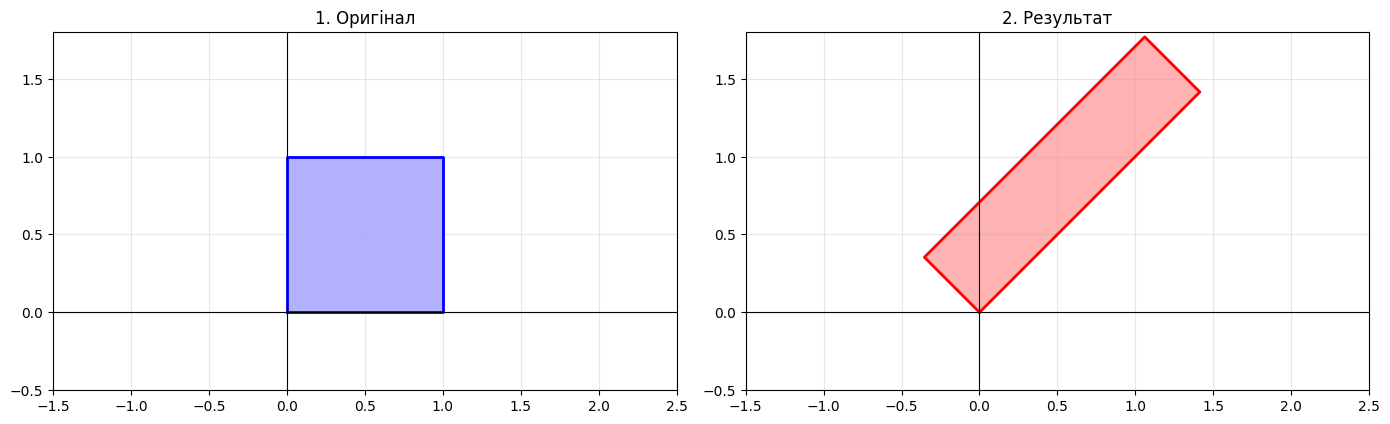

In [ ]:
# Візуалізація початкового та кінцевого стану
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Змінено на 1 рядок, 2 стовпці

# Оригінал
axes[0].plot(np.append(square[0], square[0,0]), np.append(square[1], square[1,0]), 'b-', linewidth=2)
axes[0].fill(square[0], square[1], alpha=0.3, color='blue')
axes[0].set_title('1. Оригінал', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].set_xlim(-1.5, 2.5)
axes[0].set_ylim(-0.5, 1.8) # Adjusted y-limit
axes[0].axhline(y=0, color='k', linewidth=0.8)
axes[0].axvline(x=0, color='k', linewidth=0.8)


# Кінцевий результат
axes[1].plot(np.append(square_composite[0], square_composite[0,0]), np.append(square_composite[1], square_composite[1,0]), 'r-', linewidth=2)
axes[1].fill(square_composite[0], square_composite[1], alpha=0.3, color='red')
axes[1].set_title('2. Результат', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
axes[1].set_xlim(-1.5, 2.5)
axes[1].set_ylim(-0.5, 1.8) # Adjusted y-limit
axes[1].axhline(y=0, color='k', linewidth=0.8)
axes[1].axvline(x=0, color='k', linewidth=0.8)


plt.tight_layout()
plt.show()

### Приклад 31. Простого зсуву на площині

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Зсув на вектор [2, 1]
b = np.array([2, 1])

# Квадрат
square = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0]
])

# Афінне перетворення: T(v) = I*v + b (чисто зсув без лінійної частини)
square_translated = square + b[:, np.newaxis]

print(f"Вектор зсуву: {b}")
print(f"\nПочатковий квадрат (координати вершин):")
print(square)
print(f"\nКвадрат після зсуву (координати вершин):")
print(square_translated)


Вектор зсуву: [2 1]

Початковий квадрат (координати вершин):
[[0 1 1 0 0]
 [0 0 1 1 0]]

Квадрат після зсуву (координати вершин):
[[2 3 3 2 2]
 [1 1 2 2 1]]


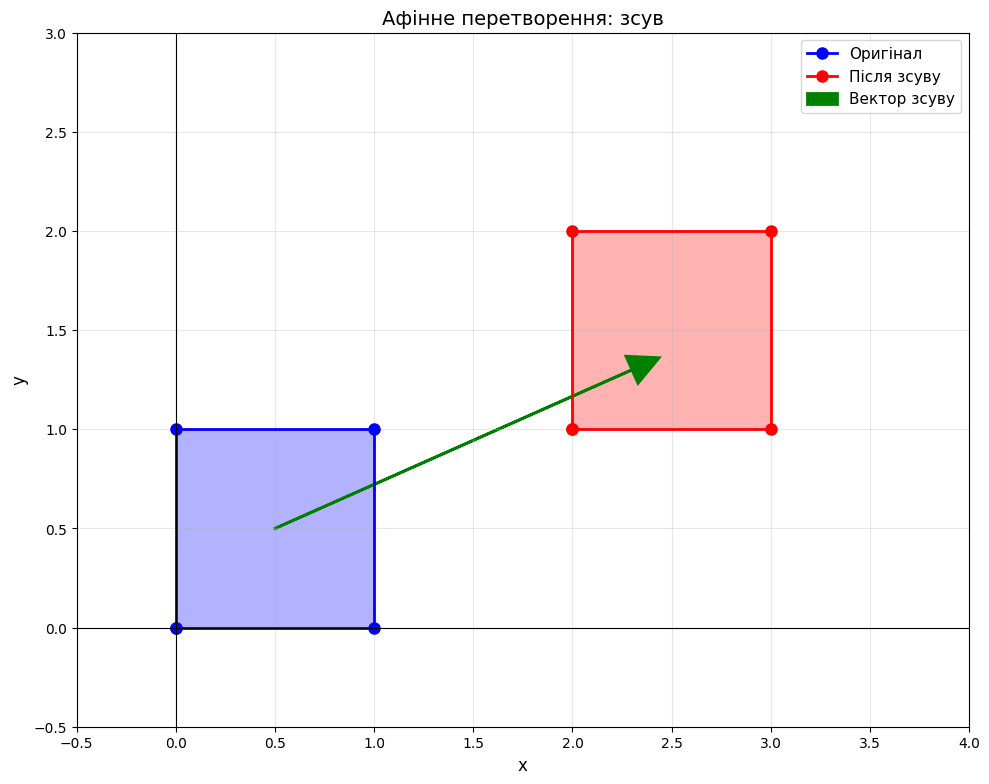

In [ ]:
# Візуалізація
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(square[0], square[1], 'b-', linewidth=2, marker='o', markersize=8, label='Оригінал')
ax.fill(square[0], square[1], alpha=0.3, color='blue')

ax.plot(square_translated[0], square_translated[1], 'r-', linewidth=2, marker='o', markersize=8, label='Після зсуву')
ax.fill(square_translated[0], square_translated[1], alpha=0.3, color='red')

# Стрілка зсуву
ax.arrow(0.5, 0.5, b[0]-0.2, b[1]-0.2, head_width=0.15, head_length=0.15,
         fc='green', ec='green', linewidth=2, label='Вектор зсуву')

ax.grid(True, alpha=0.3)
ax.set_xlim(-0.5, 4)
ax.set_ylim(-0.5, 3)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.8)
ax.axvline(x=0, color='k', linewidth=0.8)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Афінне перетворення: зсув', fontsize=14)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

### Приклад 32. Обертання та зсув

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Зсув на вектор [2, 1]
b = np.array([2, 1])

# Квадрат
square = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0]
])

# Обертання на 30°
theta = np.pi / 6  # 30 градусів
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Афінне перетворення: T(v) = R*v + b
square_affine = R @ square + b[:, np.newaxis]

print(f"\nПочатковий квадрат (координати вершин):")
print(square)
print(f"\nКвадрат після обертання та зсуву (координати вершин):")
print(square_affine)


Початковий квадрат (координати вершин):
[[0 1 1 0 0]
 [0 0 1 1 0]]

Квадрат після обертання та зсуву (координати вершин):
[[2.        2.8660254 2.3660254 1.5       2.       ]
 [1.        1.5       2.3660254 1.8660254 1.       ]]


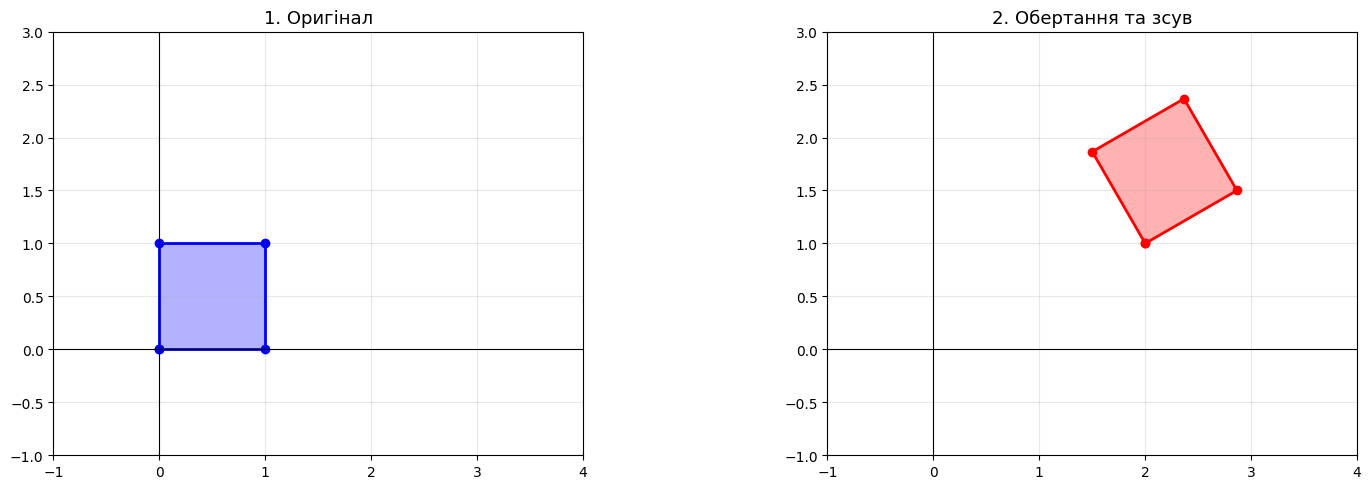

In [ ]:
# Візуалізація поетапно
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Оригінал
axes[0].plot(square[0], square[1], 'b-', linewidth=2, marker='o')
axes[0].fill(square[0], square[1], alpha=0.3, color='blue')
axes[0].set_title('1. Оригінал', fontsize=13)
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].set_xlim(-1, 4)
axes[0].set_ylim(-1, 3)
axes[0].axhline(y=0, color='k', linewidth=0.8)
axes[0].axvline(x=0, color='k', linewidth=0.8)

# Після обертання та зсуву
axes[1].plot(square_affine[0], square_affine[1], 'r-', linewidth=2, marker='o')
axes[1].fill(square_affine[0], square_affine[1], alpha=0.3, color='red')
axes[1].set_title('2. Обертання та зсув', fontsize=13)
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
axes[1].set_xlim(-1, 4)
axes[1].set_ylim(-1, 3)
axes[1].axhline(y=0, color='k', linewidth=0.8)
axes[1].axvline(x=0, color='k', linewidth=0.8)

plt.tight_layout()
plt.show()

### Приклад 33. Обертання та зсув через однорідні координати

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Квадрат
square = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0]
])

# Афінне перетворення в однорідних координатах
# Обертання на 30° + зсув [2, 1]

# Створюємо матрицю 3×3
affine_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 2],
    [np.sin(theta), np.cos(theta), 1],
    [0, 0, 1]
])

# Перетворюємо квадрат в однорідні координати
square_homogeneous = np.vstack([square, np.ones(square.shape[1])])

# Застосовуємо перетворення одним множенням
square_transformed = affine_matrix @ square_homogeneous

print(f"\nПісля перетворення:")
print(square_transformed)

# Повертаємось до звичайних координат (відкидаємо третю координату)
square_result = square_transformed[:2, :]
print(f"\nКвадрат після обертання та зсуву (координати вершин):")
print(square_result)


Після перетворення:
[[2.        2.8660254 2.3660254 1.5       2.       ]
 [1.        1.5       2.3660254 1.8660254 1.       ]
 [1.        1.        1.        1.        1.       ]]

Квадрат після обертання та зсуву (координати вершин):
[[2.        2.8660254 2.3660254 1.5       2.       ]
 [1.        1.5       2.3660254 1.8660254 1.       ]]


### Приклад 34. Складна послідовність перетворень в однорідних координатах

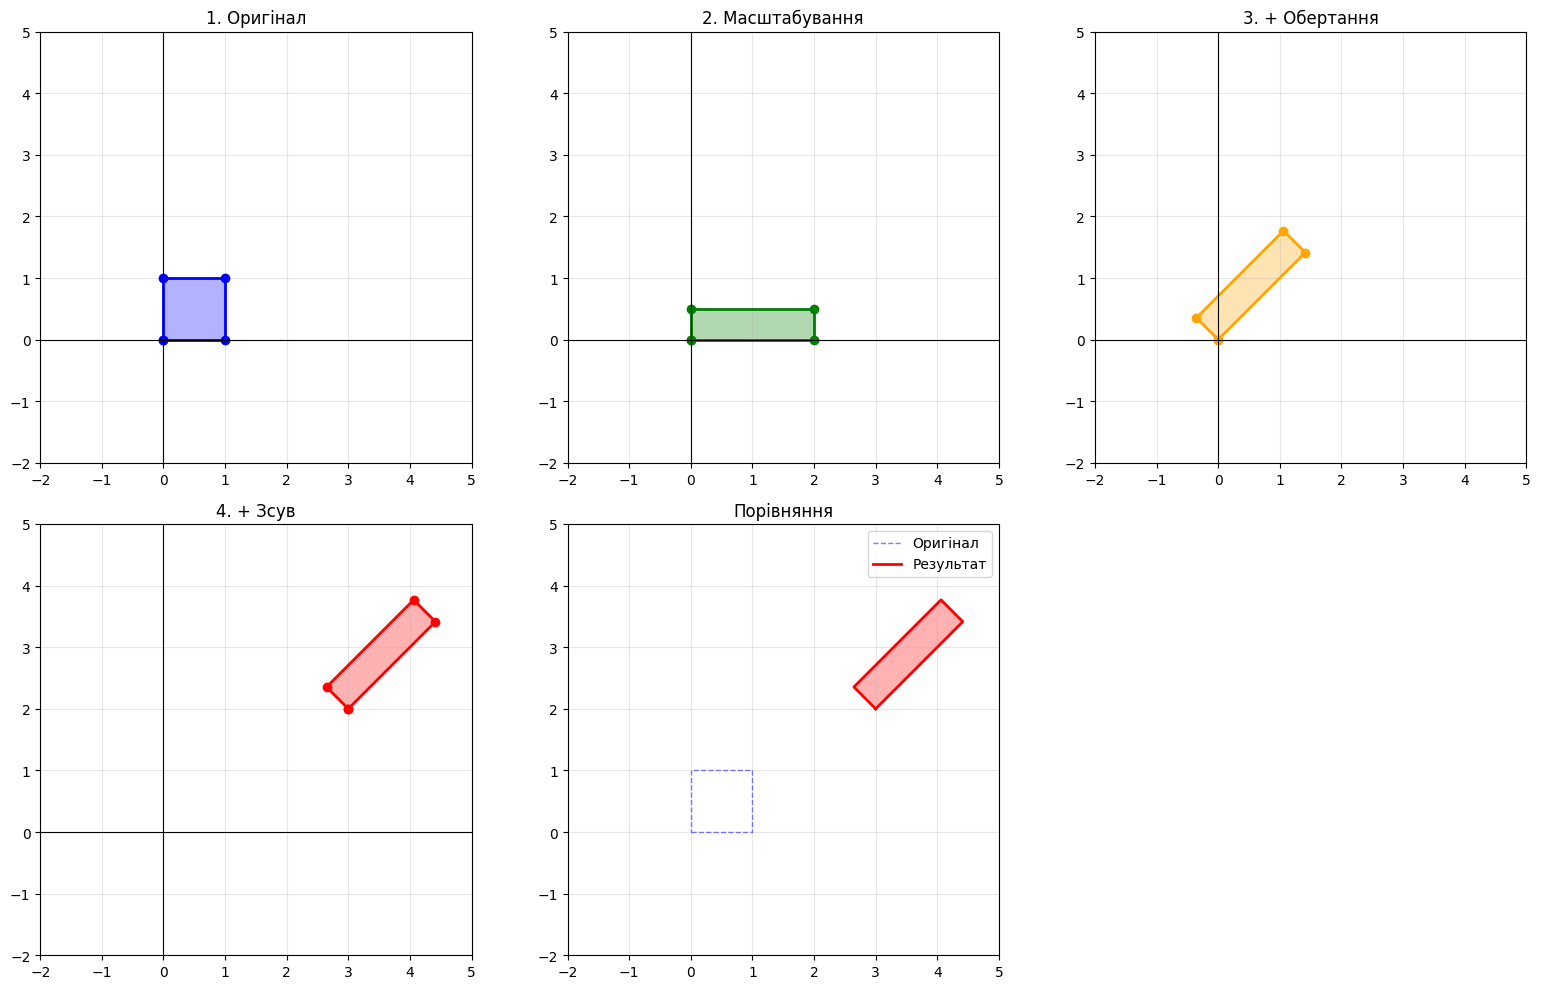

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Квадрат
square = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0]
])

# Перетворюємо квадрат в однорідні координати
square_homogeneous = np.vstack([square, np.ones(square.shape[1])])

# 1. Масштабування 2× по x, 0.5× по y
S_homog = np.array([
    [2, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

# 2. Обертання на 45°
theta2 = np.pi / 4
R_homog = np.array([
    [np.cos(theta2), -np.sin(theta2), 0],
    [np.sin(theta2), np.cos(theta2), 0],
    [0, 0, 1]
])

# 3. Зсув на [3, 2]
T_homog = np.array([
    [1, 0, 3],
    [0, 1, 2],
    [0, 0, 1]
])

# Композиція: спочатку S, потім R, потім T
composite_affine = T_homog @ R_homog @ S_homog

# Застосовуємо до квадрата
square_final = composite_affine @ square_homogeneous
square_final = square_final[:2, :]  # повертаємось до 2D

# Візуалізація всіх етапів
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Етапи
steps = [
    (square, 'Оригінал', 'blue'),
    ((S_homog @ square_homogeneous)[:2], 'Масштабування', 'green'),
    ((R_homog @ S_homog @ square_homogeneous)[:2], '+ Обертання', 'orange'),
    (square_final, '+ Зсув', 'red')
]

for i, (data, title, color) in enumerate(steps):
    if i < len(axes) - 2:
        axes[i].plot(data[0], data[1], linewidth=2, marker='o', color=color)
        axes[i].fill(data[0], data[1], alpha=0.3, color=color)
        axes[i].set_title(f'{i+1}. {title}', fontsize=12)
        axes[i].grid(True, alpha=0.3)
        axes[i].set_aspect('equal')
        axes[i].set_xlim(-2, 5)
        axes[i].set_ylim(-2, 5)
        axes[i].axhline(y=0, color='k', linewidth=0.8)
        axes[i].axvline(x=0, color='k', linewidth=0.8)

# Порівняння оригіналу і результату
axes[4].plot(square[0], square[1], 'b--', linewidth=1, alpha=0.5, label='Оригінал')
axes[4].plot(square_final[0], square_final[1], 'r-', linewidth=2, label='Результат')
axes[4].fill(square_final[0], square_final[1], alpha=0.3, color='red')
axes[4].set_title('Порівняння', fontsize=12)
axes[4].grid(True, alpha=0.3)
axes[4].set_aspect('equal')
axes[4].set_xlim(-2, 5)
axes[4].set_ylim(-2, 5)
axes[4].legend()

# Порожня осередка
axes[5].axis('off')

plt.tight_layout()
plt.show()

### Приклад 35. Схема 3D афінного перетворення

In [ ]:
# Обертання навколо осі Z + зсув

theta_3d = np.pi / 6
affine_3d = np.array([
    [np.cos(theta_3d), -np.sin(theta_3d), 0, 5],
    [np.sin(theta_3d), np.cos(theta_3d), 0, 3],
    [0, 0, 1, 2],
    [0, 0, 0, 1]
])

print("\n3D афінна матриця (4×4):")
print(affine_3d)
print("\nВерхній лівий блок 3×3 — лінійне перетворення (обертання)")
print("Правий стовпець [5, 3, 2] — вектор зсуву")


3D афінна матриця (4×4):
[[ 0.8660254 -0.5        0.         5.       ]
 [ 0.5        0.8660254  0.         3.       ]
 [ 0.         0.         1.         2.       ]
 [ 0.         0.         0.         1.       ]]

Верхній лівий блок 3×3 — лінійне перетворення (обертання)
Правий стовпець [5, 3, 2] — вектор зсуву
